In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
clicks_A = 150  
impressions_A = 2000

In [3]:
clicks_B = 180  
impressions_B = 2000

In [4]:
ctr_A = clicks_A / impressions_A
ctr_B = clicks_B / impressions_B

In [5]:
print(f"CTR for Group A: {ctr_A:.2%}")
print(f"CTR for Group B: {ctr_B:.2%}")

CTR for Group A: 7.50%
CTR for Group B: 9.00%


In [6]:
n_A = impressions_A
n_B = impressions_B

In [7]:
p_pool = (clicks_A + clicks_B) / (n_A + n_B)

In [8]:
z_score = (ctr_A - ctr_B) / np.sqrt(p_pool * (1 - p_pool) * (1/n_A + 1/n_B))
p_value = 1 - stats.norm.cdf(z_score)

In [9]:
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")

Z-Score: -1.7241
P-Value: 0.9577


In [10]:
confidence_level = 0.95
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_critical * np.sqrt((ctr_A * (1 - ctr_A) / n_A) + (ctr_B * (1 - ctr_B) / n_B))
confidence_interval = (ctr_B - ctr_A - margin_of_error, ctr_B - ctr_A + margin_of_error)

In [11]:
print(f"95% Confidence Interval for the difference in CTRs: {confidence_interval[0]:.4%} to {confidence_interval[1]:.4%}")

95% Confidence Interval for the difference in CTRs: -0.2046% to 3.2046%


In [12]:
labels = ['Group A (Control)', 'Group B (Treatment)']
ctr_values = [ctr_A, ctr_B]

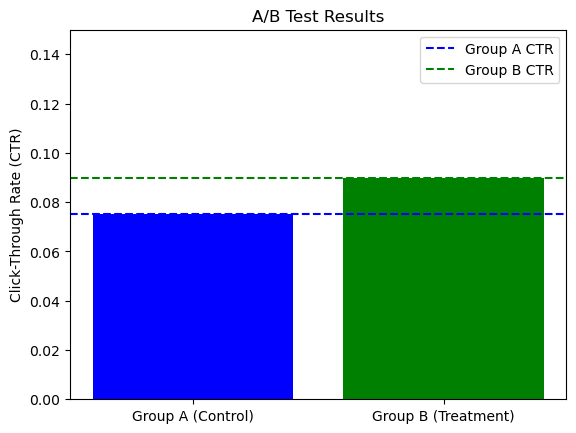

In [13]:
plt.bar(labels, ctr_values, color=['blue', 'green'])
plt.ylabel('Click-Through Rate (CTR)')
plt.title('A/B Test Results')
plt.ylim(0, 0.15)  # Set y-axis limit for better visualization
plt.axhline(y=ctr_A, color='blue', linestyle='--', label='Group A CTR')
plt.axhline(y=ctr_B, color='green', linestyle='--', label='Group B CTR')
plt.legend()
plt.show()